Система рівнянь Лотки-Вольтерри:
dx/dt = 0.21 * x - 0.0021000000000000003 * x * y
dy/dt = 0.0021000000000000003 * x * y - 0.84 * y
Результати розв'язання:
x(150) = 83.99, y(150) = 34.68


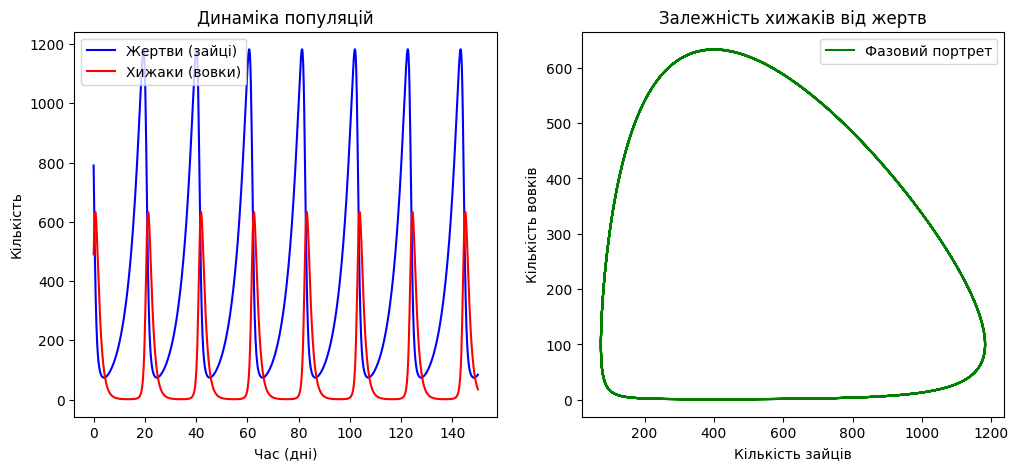

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta(f, y0, t0, T, h):
    t = np.arange(t0, T + h, h)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + h/2, y[i] + k1/2)
        k3 = h * f(t[i] + h/2, y[i] + k2/2)
        k4 = h * f(t[i] + h, y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y

# Параметри для варіанту 21
N = 21
a11, a12, a21, a22 = 0.01*N, 0.0001*N, 0.0001*N, 0.04*N
x0, y0 = 1000 - 10*N, 700 - 10*N
t0, T, h = 0, 150, 0.1

def lotka_volterra(t, y):
    x, y = y
    dxdt = a11 * x - a12 * x * y
    dydt = a21 * x * y - a22 * y
    return np.array([dxdt, dydt])

# Виведення системи рівнянь
print("Система рівнянь Лотки-Вольтерри:")
print(f"dx/dt = {a11} * x - {a12} * x * y")
print(f"dy/dt = {a21} * x * y - {a22} * y")

# Розв’язання
t, sol = runge_kutta(lotka_volterra, [x0, y0], t0, T, h)
print("Результати розв'язання:")
print(f"x({T}) = {sol[-1, 0]:.2f}, y({T}) = {sol[-1, 1]:.2f}")

# Графіки
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, sol[:, 0], label='Жертви (зайці)', color='b')
plt.plot(t, sol[:, 1], label='Хижаки (вовки)', color='r')
plt.xlabel('Час (дні)')
plt.ylabel('Кількість')
plt.legend()
plt.title('Динаміка популяцій')

plt.subplot(1, 2, 2)
plt.plot(sol[:, 0], sol[:, 1], label='Фазовий портрет', color='g')
plt.xlabel('Кількість зайців')
plt.ylabel('Кількість вовків')
plt.legend()
plt.title('Залежність хижаків від жертв')
plt.show()

Система рівнянь для моделі епідемії:
dx/dt = -4 * x * y / 979
dy/dt = 4 * x * y / 979 - 0.0476 * y
dz/dt = 0.0476 * y
Результати розв'язання:
x(40) = 0.00, y(40) = 20.46, z(40) = 483.46


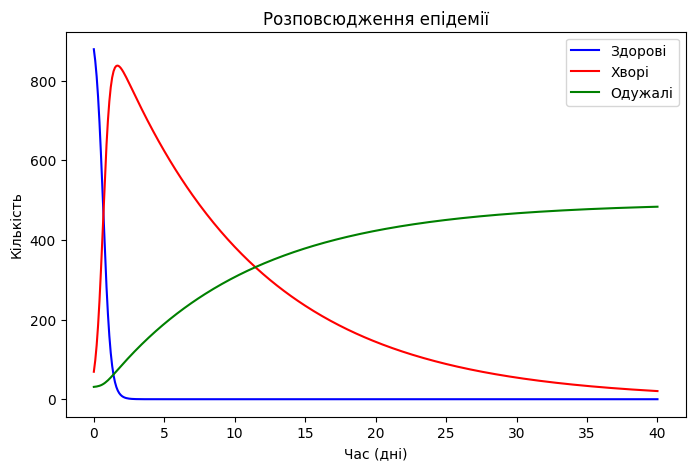

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta(f, y0, t0, T, h):
    t = np.arange(t0, T + h, h)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + h/2, y[i] + k1/2)
        k3 = h * f(t[i] + h/2, y[i] + k2/2)
        k4 = h * f(t[i] + h, y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y

# Параметри для варіанту 21
N = 21
H, beta, gamma, m = 1000 - N, 25 - N, 1/N, 0.05
x0, y0, z0 = 900 - N, 90 - N, H - (900 - N) - (90 - N)
t0, T, h = 0, 40, 0.1

def epidemic(t, y):
    x, y, z = y
    dxdt = -beta * x * y / H
    dydt = beta * x * y / H - gamma * y - y * m
    dzdt = gamma * y
    return np.array([dxdt, dydt, dzdt])

# Виведення системи рівнянь
print("Система рівнянь для моделі епідемії:")
print(f"dx/dt = -{beta} * x * y / {H}")
print(f"dy/dt = {beta} * x * y / {H} - {gamma:.4f} * y")
print(f"dz/dt = {gamma:.4f} * y")

# Розв’язання
t, sol = runge_kutta(epidemic, [x0, y0, z0], t0, T, h)
print("Результати розв'язання:")
print(f"x({T}) = {sol[-1, 0]:.2f}, y({T}) = {sol[-1, 1]:.2f}, z({T}) = {sol[-1, 2]:.2f}")

# Графіки
plt.figure(figsize=(8, 5))
plt.plot(t, sol[:, 0], label='Здорові', color='b')
plt.plot(t, sol[:, 1], label='Хворі', color='r')
plt.plot(t, sol[:, 2], label='Одужалі', color='g')
plt.xlabel('Час (дні)')
plt.ylabel('Кількість')
plt.legend()
plt.title('Розповсюдження епідемії')
plt.show()